# Aproksimacija funkcije $f(x) = \sin(x), x \in \mathbb{R}$ pomoću neuronske mreže

Authors: Marko Hajba, Gita Pejović

Institution: Virovitica University of Applied Sciences

Cilj skripte je demonstrirati kako gusta neuronska mreža može naučiti funkciju $f(x)=sin(x), x\in\mathbb{R}$.
Neuronske mreže su univerzalni aproksimatori i poznato je da mogu proizvoljno točno aproksimirati neprekidnu funkciju na nekom intervalu. Za funkciju $f(x) = \sin(x)$ možemo iskoristiti svojstvo periodičnosti i prošiti ju na cijeli skup $\mathbb{R}$. Prilikom treniranja neuronske mreže crtat ćemo trenutno rješenje kako bi vizualno uočili kako neuronske mreža uči danu funkciju.

In [ ]:
!pip install keras-tuner --upgrade

## Za početak učitavamo potrebne pakete:

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import losses
print(tf.__version__)
import keras_tuner as kt

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import time
import math
import scipy


2.8.0


## Arhitektura i važni hiperparametri neuronske mreže

Izgrađujemo arhitekturu neuronske mreže, koja osim ulaznog i izlaznog sloja sadrži i dva skrivena sloja. Svaki skriveni sloj sadrži 20 neurona. Za optimizacijsku metodu koristimo Adam sa stopom učenja $ \alpha = 0.001$. Koristit ćemo MSE funkciju gubitka. Koristeći definiranu arhitekturu, funkciju gubitka i optimizacijsku metodu, kompajliramo model.

In [ ]:
j 

In [ ]:
# jednostavna arhitektura neuronske mreže

tf.keras.backend.set_floatx('float64')
inputs = layers.Input(shape = (1, ))
h1 = layers.Dense(5, activation=tf.nn.tanh)(inputs)
h2 = layers.Dense(5, activation=tf.nn.tanh)(h1)
h3 = layers.Dense(5, activation=tf.nn.tanh)(h2)
h4 = layers.Dense(5, activation=tf.nn.tanh)(h3)
h5 = layers.Dense(5, activation=tf.nn.tanh)(h4)
h6 = layers.Dense(5, activation=tf.nn.tanh)(h5)
#h1 = layers.Dense(20, activation=tf.nn.tanh)(inputs)
#h2 = layers.Dense(20, activation=tf.keras.backend.sin)(h1)
out = layers.Dense(1)(h6)

## definiramo model
model = tf.keras.Model(inputs, out)

# definiramo optimizer i njegove parametre te kompajliramo model:
optim = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(loss=tf.keras.losses.MSE, optimizer=optim)

# arhitektura neuronske mreze:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 5)                 10        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dense_3 (Dense)             (None, 5)                 30        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 5)                 30    

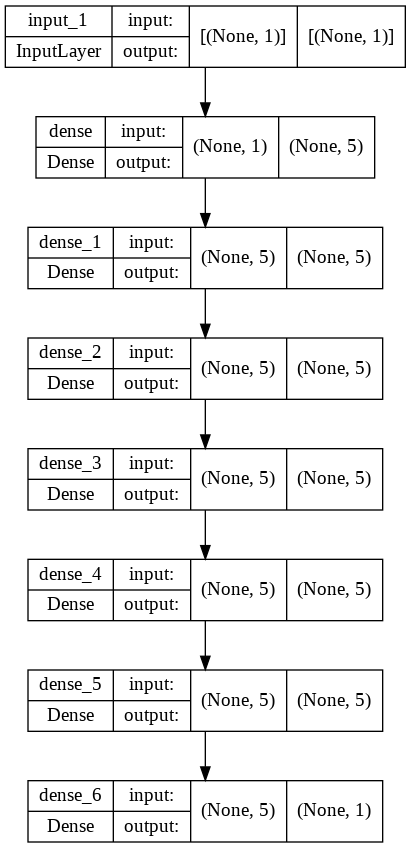

In [ ]:
## Graf neuronske mreže
graph = tf.keras.utils.plot_model(model, show_shapes=True) 
graph

## Ulazni i izlazni podaci
Definiramo ulazne i izlazne podatke, domena ulaznih podataka $x$ je segment $[0,2π]$ , a izlazni podaci $y=sin(x)$.

In [ ]:
## podaci za treniranje
x = np.linspace(0, 2*np.pi + (2*np.pi)/100, 100)#.reshape(-1, 1)
print(x.shape)
y = np.sin(x)

(100,)


In [ ]:
## Learning rate callback

def scheduler(epoch):
    if epoch < 5000:
        return 0.001
#    elif epoch < 20000:
#       return 0.001
    else:
        return 0.0001

def scheduler2(epoch):
    if epoch < 5000:
        return 0.0001
    else:
        return 0.00005


LRcallback = tf.keras.callbacks.LearningRateScheduler(scheduler)
LRcallback2 = tf.keras.callbacks.LearningRateScheduler(scheduler2)

## Treniranje neuronske mreže
Treniramo neuronsku mrežu koristeći 100 uređenih parova $(x, y)$, veličinu grupe postavljamo na vrijednost broja ulaznih podataka i broj prolaza kroz podatke, odnosno ukupni broj epoha je 20000. Crtat ćemo za epohe 1, 10, 1000, 5000, 10000 i 20000 funkciju $f(x) = \sin(x)$ i aproksimaciju $NM(x)$ kako bismo pratili napredak neuronske mreže. Izračunat ćemo i funkciju gubitka u tim epohama.

In [ ]:
# Prije početka treniranja (epoha 0):
y_epoch0 = model(x) ## prije početka treniranja

In [ ]:
## treniranje neuronske mreže
################ epoch 1: ###################
start = time.time()
history = model.fit(x, y, #in_train,## ulazni podaci, izlazni podaci
            batch_size = len(x), verbose=0, epochs = 1, callbacks = [LRcallback] )
y_epoch1 = model(x)
loss = []
loss.append(history.history['loss'])
loss_epoch1 = []
loss_epoch1 = history.history['loss'][len(loss_epoch1)-1]
print('Funkcija gubitka nakon 1 epohe:', loss_epoch1)

################ epoch 10: ###################
history = model.fit(x, y, #in_train,## ulazni podaci, izlazni podaci
            batch_size = len(x), verbose=0, epochs = 9, callbacks = [LRcallback] )
y_epoch10 = model(x)
loss.append(history.history['loss'])
loss_epoch10 = []
loss_epoch10 = history.history['loss'][len(loss_epoch10)-1]
print('Funkcija gubitka nakon 10 epoha:', loss_epoch10)

################ epoch 1000: ###################
history = model.fit(x, y, #in_train,## ulazni podaci, izlazni podaci
            batch_size = len(x), verbose=0, epochs = 990, callbacks = [LRcallback] )
y_epoch1000 = model(x)
loss.append(history.history['loss'])
loss_epoch1000 = []
loss_epoch1000 = history.history['loss'][len(loss_epoch1000)-1]
print('Funkcija gubitka nakon 1000 epoha:', loss_epoch1000)

################ epoch 5000: ###################
history = model.fit(x, y, #in_train,## ulazni podaci, izlazni podaci
            batch_size = len(x), verbose=0, epochs = 4000, callbacks = [LRcallback] )
y_epoch5000 = model(x)
loss.append(history.history['loss'])
loss_epoch5000 = []
loss_epoch5000 = history.history['loss'][len(loss_epoch5000)-1]
print('Funkcija gubitka nakon 5000 epoha:', loss_epoch5000)

################ epoch 10000: ###################
history = model.fit(x, y, #in_train,## ulazni podaci, izlazni podaci
            batch_size = len(x), verbose=0, epochs = 5000, callbacks = [LRcallback2] )
y_epoch10000 = model(x)
loss.append(history.history['loss'])
loss_epoch10000 = []
loss_epoch10000 = history.history['loss'][len(loss_epoch10000)-1]
print('Funkcija gubitka nakon 10000 epoha:', loss_epoch10000)

################ epoch 20000: ###################
history = model.fit(x, y, #in_train,## ulazni podaci, izlazni podaci
            batch_size = len(x), verbose=0, epochs = 10000, callbacks = [LRcallback2] )
y_epoch20000 = model(x)
loss.append(history.history['loss'])
loss_epoch20000 = []
loss_epoch20000 = history.history['loss'][len(loss_epoch20000)-1]
print('Funkcija gubitka nakon 20000 epoha:', loss_epoch20000)

####################################################
print('Vrijeme treniranja: ', np.round(time.time() - start, 2), ' s')

Funkcija gubitka nakon 1 epohe: 0.5296394228935242
Funkcija gubitka nakon 10 epoha: 0.4833609461784363
Funkcija gubitka nakon 1000 epoha: 0.004249222110956907
Funkcija gubitka nakon 5000 epoha: 5.607775619864697e-06
Funkcija gubitka nakon 10000 epoha: 2.0850409327977104e-06
Funkcija gubitka nakon 20000 epoha: 5.074805358162848e-07
Vrijeme treniranja:  68.22  s


dict_keys(['loss', 'lr'])


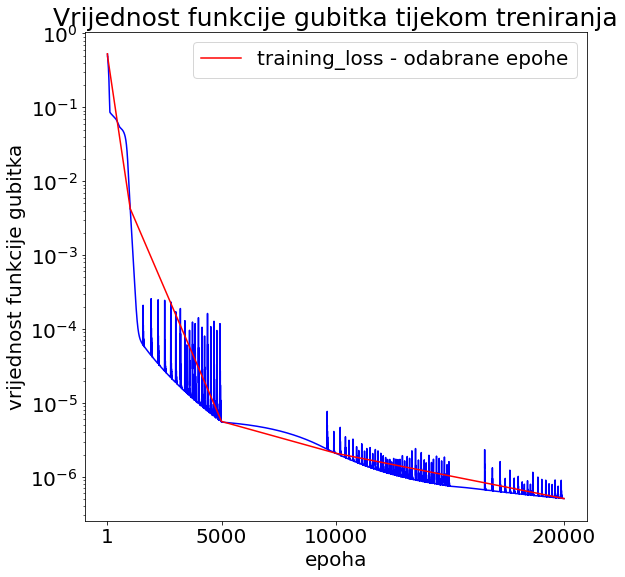

In [ ]:
# crtamo loss (pogrešku modela) za odabrane epohe i uredimo graf
print(history.history.keys())
loss_train = history.history['loss']
loss_needed = [loss_epoch1, loss_epoch10, loss_epoch1000, loss_epoch5000, loss_epoch10000, loss_epoch20000]
epoch_my = [1, 10, 1000, 5000, 10000, 20000]
fig = plt.figure(figsize=(9, 9))
plt.plot(1, loss[0], 'b', range(2,11), loss[1], 'b',  range(11,1001), loss[2], 'b', range(1001,5001), loss[3], 'b', range(5001, 10001), loss[4], 'b', range(10001,20001), loss[5], 'b')
plt.plot(epoch_my, loss_needed, 'r', label='training_loss - odabrane epohe')

plt.title('Vrijednost funkcije gubitka tijekom treniranja', fontsize = 25)
plt.yscale('log')
plt.xticks([1, 5000, 10000, 20000], fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('epoha', fontsize = 20)
plt.ylabel('vrijednost funkcije gubitka', fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

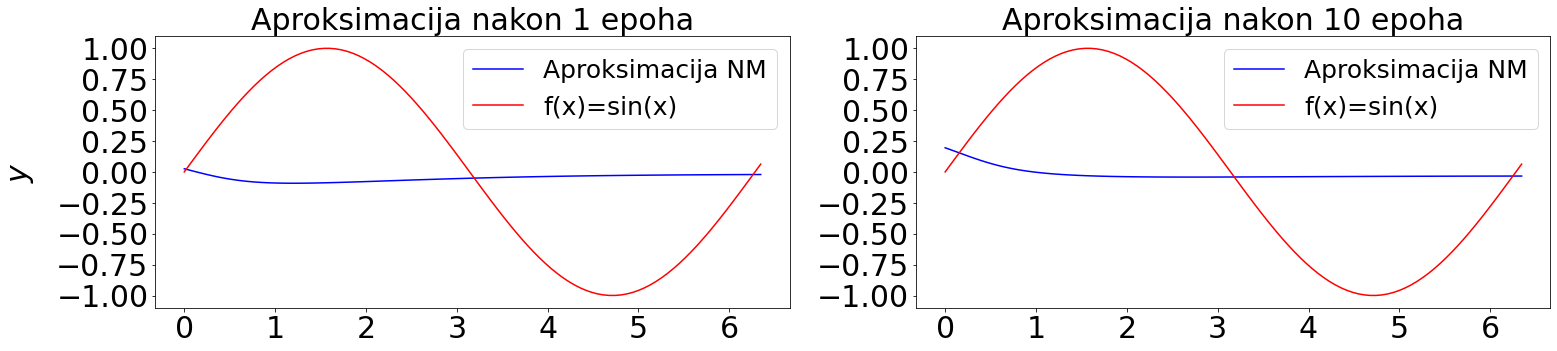

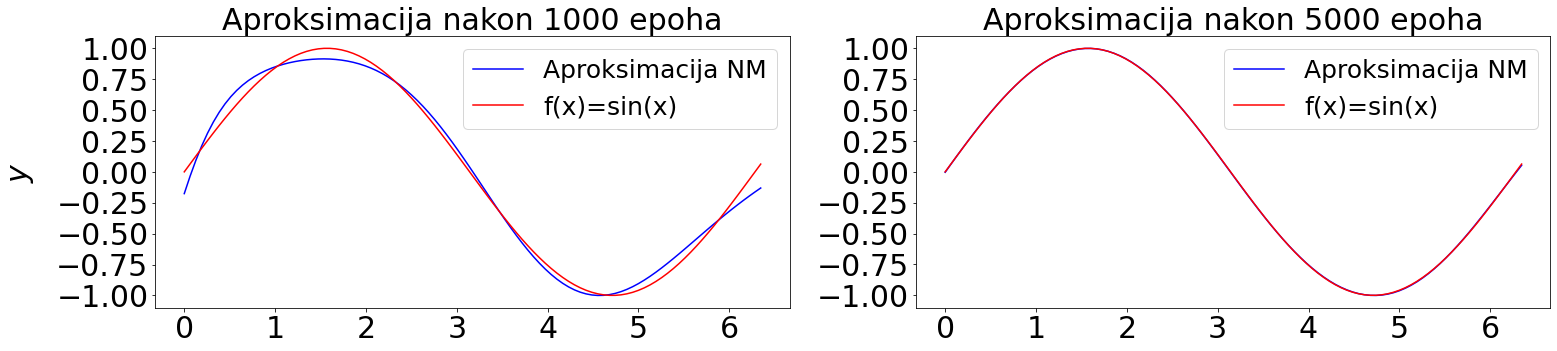

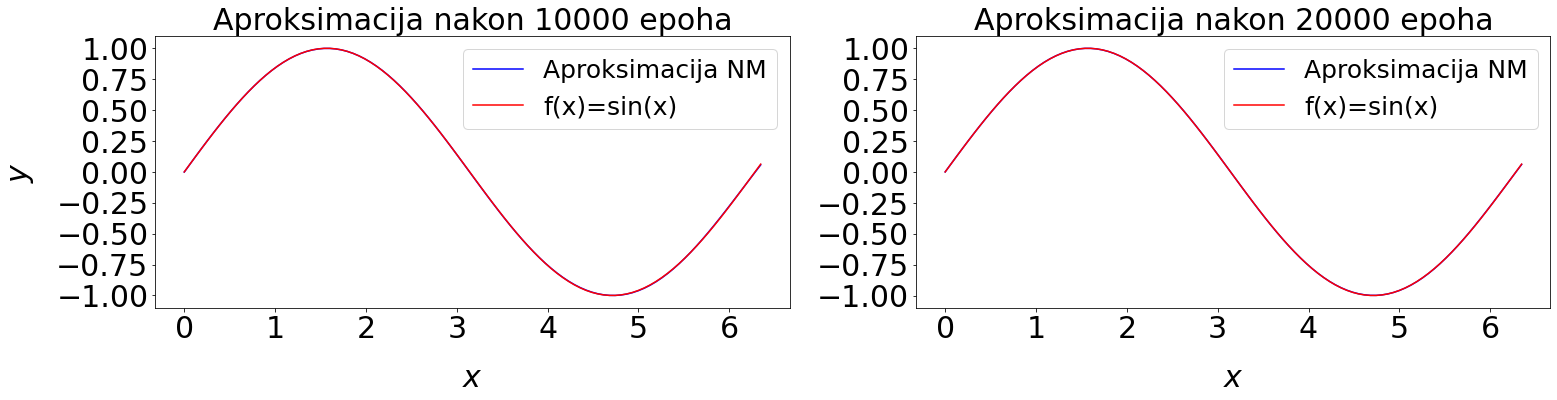

In [ ]:
y_epochs = [y_epoch1, y_epoch10, y_epoch1000, y_epoch5000, y_epoch10000, y_epoch20000]

fig = plt.figure(figsize=(25, 5))
for i in range(0, 2):
    ax = fig.add_subplot(1, 2, i+1)
    plt.plot(x, y_epochs[i], 'b', label='Aproksimacija NM')
    plt.plot(x, y, 'r', label='f(x)=sin(x)')
    plt.title('Aproksimacija nakon '+str(epoch_my[i])+' epoha', fontsize = 30)
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize = 30)
    plt.legend(fontsize = 25)
    if i%2== 0:
      ax.set_ylabel('$y$', labelpad = 20, fontsize = 30)
    if i > 3:
      ax.set_xlabel('$x$', labelpad = 20, fontsize = 30)
#plt.show()
fig = plt.figure(figsize=(25, 5))
for i in range(2, 4):
    ax = fig.add_subplot(1, 2, i-1)
    plt.plot(x, y_epochs[i], 'b', label='Aproksimacija NM')
    plt.plot(x, y, 'r', label='f(x)=sin(x)')
    plt.title('Aproksimacija nakon '+str(epoch_my[i])+' epoha', fontsize = 30)
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize = 30)
    plt.legend(fontsize = 25)
    if i%2== 0:
      ax.set_ylabel('$y$', labelpad = 20, fontsize = 30)
    if i > 3:
      ax.set_xlabel('$x$', labelpad = 20, fontsize = 30)    

fig = plt.figure(figsize=(25, 5))
for i in range(4, 6):
    ax = fig.add_subplot(1, 2, i-3)
    plt.plot(x, y_epochs[i], 'b', label='Aproksimacija NM')
    plt.plot(x, y, 'r', label='f(x)=sin(x)')
    plt.title('Aproksimacija nakon '+str(epoch_my[i])+' epoha', fontsize = 30)
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize = 30)
    plt.legend(fontsize = 25)
    if i%2== 0:
      ax.set_ylabel('$y$', labelpad = 20, fontsize = 30)
    if i > 3:
      ax.set_xlabel('$x$', labelpad = 20, fontsize = 30)    



## Test 1: ista domena, različiti ulazni podaci
Provodimo testiranje neuronske mreže na drugačijem skupu točaka od onih sa kojima je trenirala, ali su ulazni podaci iz iste domene. Računamo funkciju gubitka i uočavamo da je reda $10^{-7}$, odnosno da je prosječna razlika između željenih i dobivenih izlaznih vrijednosti na razini jednostruke preciznosti realnih brojeva na računalu.
Grafički prikaz dodatno potvrđuje da se funkcija sinus i funkcija koja predstavlja predviđanje neuronske mreže vizualno poklapaju.
Konačnu provjeru radimo pomoću mjerenja relativne $L_2$ pogreške koristeći Gaussovu integraciju.

In [ ]:
## test1 modela - na drugačijem skupu točaka
xt = np.linspace(0, 2*np.pi+(2*np.pi)/100, 100).reshape(-1, 1)
yt = np.sin(xt)

test_loss = model.evaluate(xt, yt)
prediction = model.predict(xt)
print(test_loss)

4/4 [==============================] - 0s 3ms/step - loss: 5.0747e-07
5.074720229458762e-07


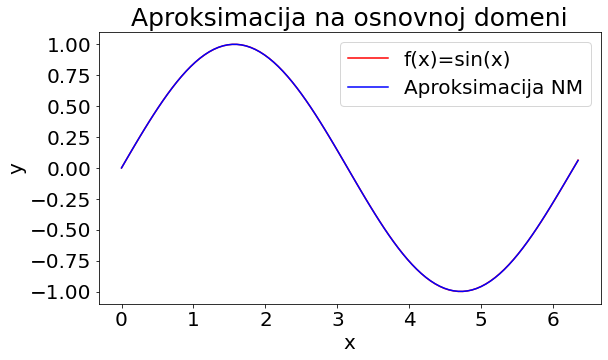

In [ ]:
# crtamo rezultate testa1
fig = plt.figure(figsize=(9, 5))
ax1 = plt.subplot(111)
plt.title('Aproksimacija na osnovnoj domeni', fontsize = 25)
ax1.plot(xt, yt, 'r', label='f(x)=sin(x)')
ax1.plot(xt, prediction, 'b', label='Aproksimacija NM')
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.legend(fontsize = 20)
ax1.legend(fontsize = 20)

Relativna pogreška u $L_2$ normi

$E_{rel} =\sqrt{ \frac{\int_\Omega | u - \hat{u} |^2}{\int_\Omega |u|^2}}$

In [ ]:
# generate Gaussian quadrature points on [-1, 1]
[x1, w] = tf.constant(scipy.special.roots_legendre(100))
a = 0
b = 2*np.pi

xG = 0.5*(x1 + 1)*(b - a) + a

u = np.sin(xG)
u_NN = model.predict(xG).reshape((len(xG), ))
E_rel = np.sqrt(np.sum(np.dot(w, (u - u_NN)**2))) / np.sqrt(np.sum(np.dot(w, (u)**2)))
print(E_rel)

0.0009374391644997027


## Test 2: Ekstrapolacija bez korištenja periodičnosti
Provodimo drugo testiranje u kojem neuronskoj mreži dajemo različite točke od onih sa kojima je trenirala, ali i proširujemo domenu ulaznih podataka. Računamo funkciju gubitka i dobivamo veliku vrijednost za nju.
Crtamo rezultate drugog testiranja i analizom grafa uočavamo da se funkcija sinus i funkcija koja predstavlja predviđanje neuronske mreže poklapaju na intervalu na kojem je neuronska mreža trenirala. Izvan intervala treninga navedene dvije funkcije su vrlo različite. Optimizacijska metoda se zasniva na gradijentu koji je lokalno svojstvo i zato izvan granica domena na kojoj smo trenirali neuronske mrežu, nemamo garanciju da se mreža biti točna.

In [ ]:
## test2 modela - ekstrapolacija na [-10, 10]
xt2 = np.linspace(-10, 10, 100).reshape(-1, 1)
yt2 = np.sin(xt2)

test_loss = model.evaluate(xt2, yt2)
prediction2 = model.predict(xt2)
print(test_loss)

4/4 [==============================] - 0s 3ms/step - loss: 0.3740
0.37402434527873996


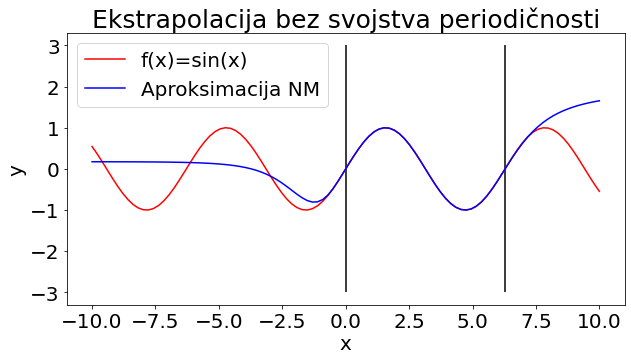

In [ ]:
# crtamo rezultate testa 2
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(111)
ax1.plot(xt2, yt2, 'r', label='f(x)=sin(x)')
ax1.plot(xt2, prediction2, 'b', label='Aproksimacija NM')
ax1.vlines(0, -3, 3, 'k')
ax1.vlines(2*np.pi, -3, 3, 'k')
plt.title("Ekstrapolacija bez svojstva periodičnosti", fontsize = 25)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.legend(fontsize = 20)
ax1.legend(fontsize = 20)

## Test 3: Ekstrapolacija pomoću periodičnosti
U trećem numeričkom eksperimentu pokušat ćemo popraviti rezultate tako da ulazne podatke iz drugog testiranja premjestimo u osnovni period $[0, 2π]$. Računamo funkciju gubitka i dobivamo vrijednost reda $10^{-7}$. Analizom grafa uočavamo da se sada funkcija sinus i funkcija koja predstavlja predviđanje neuronske mreže poklapaju na cijelom intevralu, odnosno i na trening skupu i na test skupu. To nam pokazuje da smo ekstrapolaciju uspjeli riješiti pomoću periodičnosti.

In [ ]:
## pokušaj popravka - x premjestiti u osnovni period

def OsnovniPeriod(x):
  return  x - math.floor(x/(2*np.pi))*2*np.pi

# testiramo definiranu funkciju:
print(OsnovniPeriod(1))
print(OsnovniPeriod(np.pi))
print(OsnovniPeriod(-10), np.sin(OsnovniPeriod(-10)))
print(OsnovniPeriod(10), np.sin(OsnovniPeriod(10)))

1.0
3.141592653589793
2.5663706143591725 0.5440211108893702
3.7168146928204138 -0.54402111088937


In [ ]:
## test3 modela - ekstrapolacija na [-10, 10] koristeći osnovni period
xt3 = np.linspace(-10, 10+1/5, 100).reshape(-1, 1)
xt31 = np.zeros((len(xt3), ))
for i in range(len(xt3)):
  xt31[i] = OsnovniPeriod(xt3[i])
yt3 = np.sin(xt31)

test_loss = model.evaluate(xt31, yt3)
prediction3 = model.predict(xt31)
print(test_loss)

4/4 [==============================] - 0s 3ms/step - loss: 4.4549e-07
4.45486025455466e-07


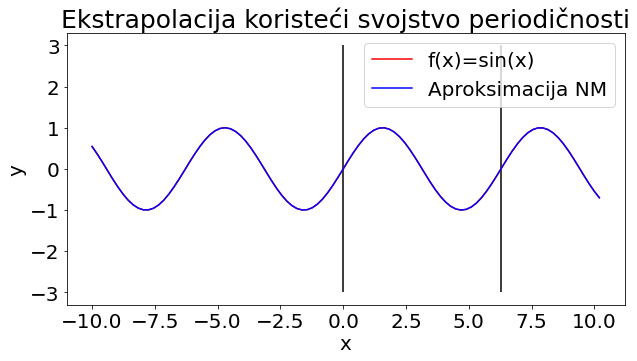

In [ ]:
# crtamo rezultate testa 3
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(111)
ax1.plot(xt3, yt3, 'r', label='f(x)=sin(x)')
ax1.plot(xt3, prediction3, 'b', label='Aproksimacija NM')
ax1.vlines(0, -3, 3, 'k')
ax1.vlines(2*np.pi, -3, 3, 'k')
plt.title("Ekstrapolacija koristeći svojstvo periodičnosti", fontsize = 25)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.legend(fontsize = 20)
ax1.legend(fontsize = 20)

$L_2$ relativna pogreška na $[-1000, 1000]$ koristeći periodičnost

In [ ]:
# generate Gaussian quadrature points on [-1, 1]
[x1, w] = tf.constant(scipy.special.roots_legendre(10000))
a = -1000
b = 1000
xG2 = 0.5*(x1 + 1)*(b - a) + a

xt32 = np.zeros((len(xG2), ))
for i in range(len(xt32)):
  xt32[i] = OsnovniPeriod(xG2[i])

u = np.sin(xG2)
u_NN = model.predict(xt32).reshape((len(xt32), ))
print(u_NN.shape)
E_rel = np.sqrt(np.sum(np.dot(w, (u - u_NN)**2)) / np.sum(np.dot(w, (u)**2)))
print(E_rel)

(10000,)
0.0009384705279215994
